In [2]:
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from data335 import lm, stan_lm, bambi_lm, mad, plot_regression_line

In [152]:
df = pd.read_csv(
    "../data/earnings.csv", usecols=["weight", "height", "male", "ethnicity"]
).dropna()
df

,height,weight,male,ethnicity
0,74,210.0,1,White
1,66,125.0,0,White
2,64,126.0,0,White
3,65,200.0,0,White
4,63,110.0,0,Other
...,...,...,...,...
1811,61,120.0,0,White
1812,64,130.0,0,White
1813,72,194.0,1,White
1814,63,155.0,0,Other


In [153]:
ethnicities = pd.get_dummies(df["ethnicity"])
ethnicities

,Black,Hispanic,Other,White
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
1811,False,False,False,True
1812,False,False,False,True
1813,False,False,False,True
1814,False,False,True,False


In [162]:
X = pd.concat([df[["height", "male"]], ethnicities], axis=1)
y = df["weight"]
X
model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(-105.81367899329868,
 array([ 3.85213496, 12.1063201 ,  5.90126453, -0.25104753, -6.36009046,
         0.70987346]))

In [157]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ height + male + Black + Hispanic + Other + White", data)
fit

/Users/mgreenbe/DATA335W2025/code/data335.py:113: RuntimeWarning: invalid value encountered in sqrt
  coef_se = se * np.sqrt(unscaled_coef_cov.diagonal())


,estimate,standard error,t-statistic,p-value
Intercept,4422.546875,NaN,NaN,NaN
height,20.263449,19.350139,1.047199,0.29515
male,-102.423275,152.586856,-0.671246,0.502151
Black,-3404.750000,NaN,NaN,NaN
Hispanic,-1145.609375,NaN,NaN,NaN
Other,-2942.593750,NaN,NaN,NaN
White,-3655.765625,NaN,NaN,NaN
sigma,2189.603175,,,


In [158]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ height + male + Black + Hispanic + Other", data)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-105.103806,16.3732,-6.419258,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
Black,5.191391,2.267693,2.289283,0.022179
Hispanic,-0.960921,2.939356,-0.326915,0.74377
Other,-7.069964,4.784855,-1.477571,0.139699
sigma,28.636333,,,


In [163]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ 0 + height + male + Black + Hispanic + Other + White", data)
fit

,estimate,standard error,t-statistic,p-value
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
Black,-99.912414,16.44868,-6.07419,0.0
Hispanic,-106.064727,16.265595,-6.520802,0.0
Other,-112.173769,16.620302,-6.749201,0.0
White,-105.103806,16.3732,-6.419258,0.0
sigma,28.636333,,,


In [165]:
fit = lm("weight ~ height + male + C(ethnicity)", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-99.912414,16.44868,-6.07419,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
C(ethnicity)[T.Hispanic],-6.152312,3.555277,-1.730473,0.083719
C(ethnicity)[T.Other],-12.261355,5.184896,-2.364822,0.018145
C(ethnicity)[T.White],-5.191391,2.267693,-2.289283,0.022179
sigma,28.636333,,,


In [168]:
data = df.copy()
data["ethnicity"] = df["ethnicity"].astype("category")
fit = lm("weight ~ height + male + ethnicity", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-99.912414,16.44868,-6.07419,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
ethnicity[T.Hispanic],-6.152312,3.555277,-1.730473,0.083719
ethnicity[T.Other],-12.261355,5.184896,-2.364822,0.018145
ethnicity[T.White],-5.191391,2.267693,-2.289283,0.022179
sigma,28.636333,,,


In [173]:
data["ethnicity"] = data["ethnicity"].cat.reorder_categories(
    ["White", "Black", "Hispanic", "Other"]
)
data["ethnicity"].cat.categories

Index(['White', 'Black', 'Hispanic', 'Other'], dtype='object')

In [175]:
fit = lm("weight ~ height + male + ethnicity", data)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-105.103806,16.3732,-6.419258,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
ethnicity[T.Black],5.191391,2.267693,2.289283,0.022179
ethnicity[T.Hispanic],-0.960921,2.939356,-0.326915,0.74377
ethnicity[T.Other],-7.069964,4.784855,-1.477571,0.139699
sigma,28.636333,,,


### Residual plots

- Residuals:
  $$
  r_i = y_i - (\hat{\beta}_0x_0 + \hat{\beta}_1 x_1 + \cdots + \hat{\beta}_{n-1}x_{n-1})
  $$

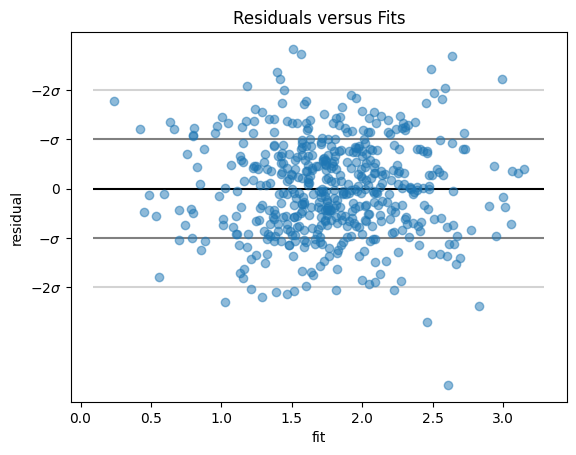

In [677]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
e = rng.normal(size=n)
y = X @ b + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y_pred, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

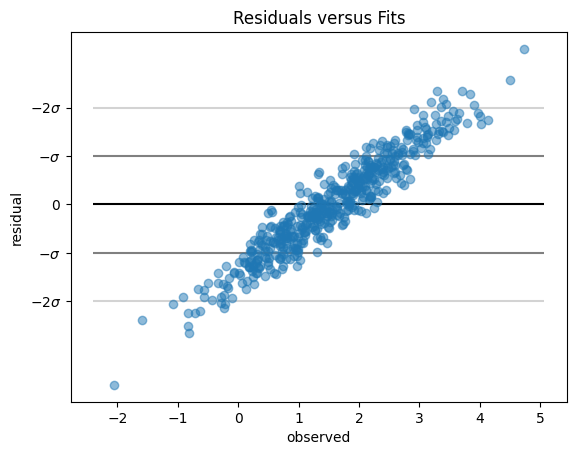

In [680]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
e = rng.normal(size=n)
y = X @ b + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("observed")
plt.ylabel("residual")
plt.show()

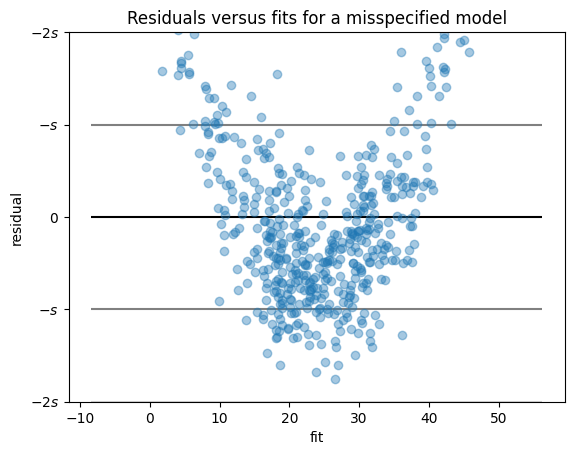

In [679]:
n = 500
p = 10
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
b = 2 * rng.uniform(size=p)
e = rng.normal(size=n)
y = (X @ b) ** 2 + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r = y - y_pred
s = r.std()

plt.plot(y_pred, r, "o", alpha=0.4)
plt.ylim(-3, 3)
plt.hlines(
    [-2 * s, -s, 0, s, 2 * s],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks([-2 * s, -s, 0, s, 2 * s], ["$-2s$", "$-s$", "$0$", "$-s$", "$-2s$"])
plt.title("Residuals versus fits for a misspecified model")
plt.xlabel("fit")
plt.ylabel("residual")

plt.show()

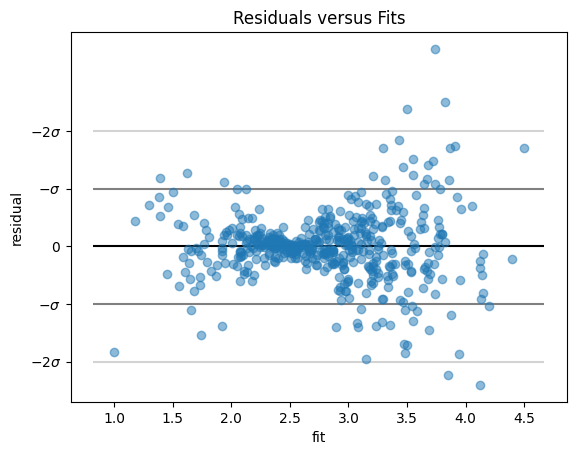

In [199]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
y = X @ b
y = y + (y - 2.5) * rng.normal(size=n)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y_pred, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

In [198]:
y.mean()

2.589869937769013

In [186]:
def make_data():
    n = 500
    np.random.seed(0)
    age = np.random.choice([0, 1, 2, 3], size=n)
    exercise = 2 * age + 3 * np.random.normal(size=n) + 6
    colesterol = 200 + 30 * age - 5 * exercise + 10 * np.random.normal(size=n)
    df = pd.DataFrame({"age": age, "exercise": exercise, "colesterol": colesterol})
    return df


data = make_data()
data.head()

,age,exercise,colesterol
0,0,7.569830,156.823822
1,3,11.485361,243.480692
2,1,10.315372,174.960647
3,0,8.470512,149.701074
4,3,18.489708,199.531134


<Axes: xlabel='exercise', ylabel='colesterol'>

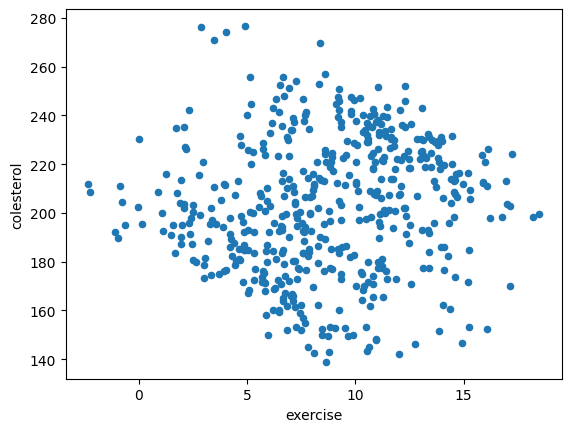

In [187]:
data.plot.scatter("exercise", "colesterol")

In [ ]:
fit = lm("colesterol ~ exercise", data)

,estimate,standard error,t-statistic,p-value
Intercept,197.127831,2.996137,65.793989,0.0
exercise,0.633311,0.313554,2.019784,0.043941
sigma,27.385991,,,


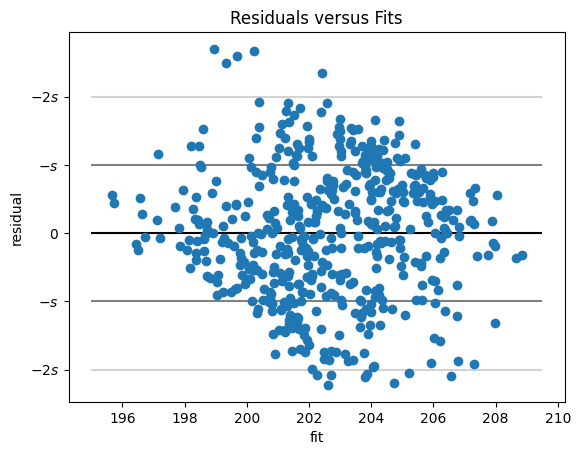

In [ ]:
s = fit.se
plt.scatter(y_pred, r)
plt.hlines(
    [-2 * s, -s, 0, s, 2 * s],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks([-2 * s, -s, 0, s, 2 * s], ["$-2s$", "$-s$", "$0$", "$-s$", "$-2s$"])
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

x.min() = 0.00, x.max() = 20.03


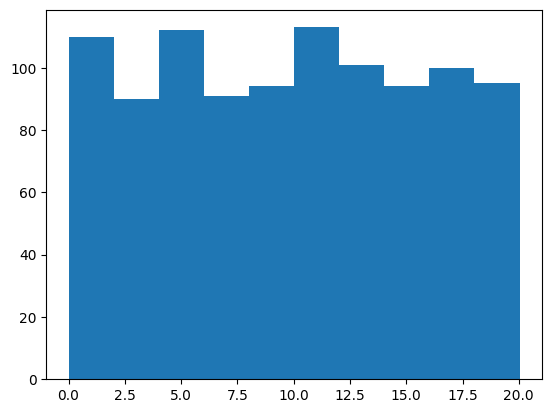

In [ ]:
rng = np.random.default_rng()
n = 1000

x = np.exp(3) * rng.uniform(size=n)
print(f"x.min() = {x.min():.2f}, x.max() = {x.max():.2f}")
plt.hist(x)
plt.show()

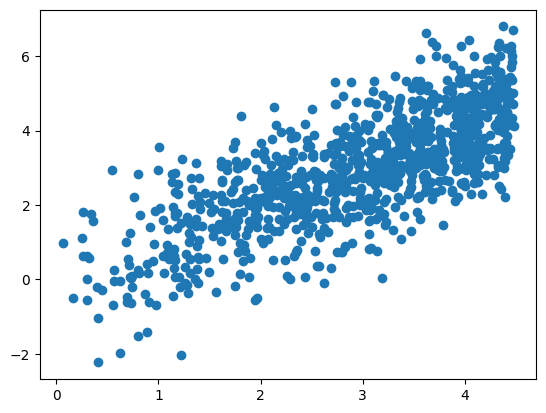

In [233]:
y = np.sqrt(x) + rng.normal(size=n)
plt.plot(np.sqrt(x), y, "o")

#### How does spending on food change as incomes rise?

- Hanna Ritchie, [Share of expenditure spent on food vs. total consumer
expenditure](https://ourworldindata.org/grapher/food-expenditure-share-gdp), Our World in Data, 2023.

In [698]:
data = (
    pd.read_csv(
        "../data/food-expenditure-vs-gdp.csv",
        usecols=[
            "Entity",
            "Year",
            "Total food expenditure",
            "Total consumer expenditure",
        ],
    )
    .rename(
        columns={
            "Total food expenditure": "Food",
            "Total consumer expenditure": "Consumer",
        }
    )
    .dropna()
)

for entity, group in data.groupby("Entity"):
    assert all(group["Year"].unique() == [2018, 2019, 2020, 2021, 2022])

data = data.groupby("Entity").agg("mean").round()
data.pop("Year")
data

,Food,Consumer
Entity,,
Algeria,596.0,1643.0
Angola,641.0,1333.0
Argentina,1531.0,6515.0
Australia,3004.0,31418.0
Austria,2550.0,25850.0
...,...,...
United States,2806.0,44283.0
Uruguay,1930.0,10766.0
Uzbekistan,357.0,949.0


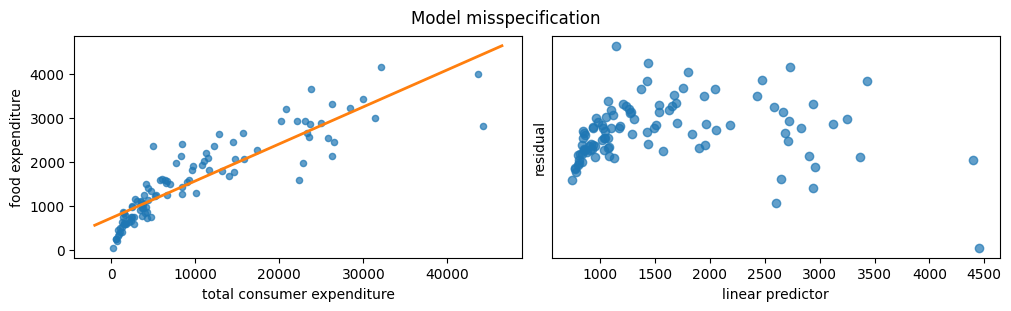

In [366]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), layout="constrained")

data.plot.scatter("Consumer", "Food", ax=ax0, alpha=0.7)
fit = lm("Food ~ Consumer", data)
plot_regression_line(fit.coef_est, ax=ax0, lw=2, color="C1")
food_pred = food_pred = fit.predict(data)
residuals = data["Food"] - food_pred

ax0.set_xlabel("total consumer expenditure")
ax0.set_ylabel("food expenditure")

ax1.scatter(food_pred, residuals, alpha=0.7)
ax1.set_yticks([])
ax1.set_ylabel("residual")
ax1.set_xlabel("linear predictor")

fig.suptitle("Model misspecification")
plt.show()

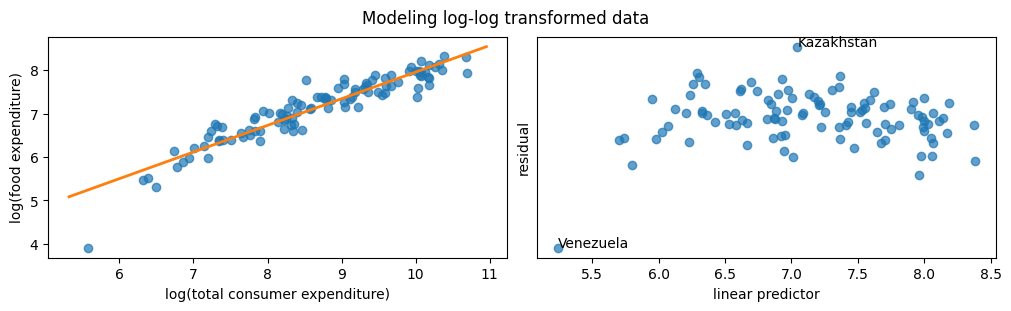

In [368]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), layout="constrained")

ax0.scatter(np.log(data["Consumer"]), np.log(data["Food"]), alpha=0.7)
fit = lm("log(Food) ~ log(Consumer)", data)
plot_regression_line(fit.coef_est, ax=ax0, lw=2, color="C1")
food_pred = food_pred = fit.predict(data)
residuals = np.log(data["Food"]) - food_pred

ax0.set_xlabel("log(total consumer expenditure)")
ax0.set_ylabel("log(food expenditure)")

ax1.scatter(food_pred, residuals, alpha=0.7)
ax1.set_yticks([])
ax1.set_ylabel("residual")
ax1.set_xlabel("linear predictor")

fig.suptitle("Modeling log-log transformed data")

i = residuals.argmin()
j = residuals.argmax()

ax1.annotate(text=data.index[i], xy=(food_pred[i], residuals.iloc[i]))
ax1.annotate(text=data.index[j], xy=(food_pred[j], residuals.iloc[j]))
plt.show()

- [Kazakhstanis Are Spending More Than a Half of Their Income on Food](https://kz.kursiv.media/en/2021-02-25/kazakhstanis-are-spending-more-half-their-income-food/)

- [Shortages in Venezuela](https://en.wikipedia.org/wiki/Shortages_in_Venezuela#cite_note-economist.com-7)

- [Engel's Law: Richer people spend more money on food, but it makes up a smaller share of their income](https://ourworldindata.org/engels-law-food-spending)

In [ ]:
df = (
    pd.read_csv("../data/ncbirths.csv")
    .drop(columns=["fage"])
    .dropna()
    .reset_index(drop=True)
)

assert np.allclose(df["weeks"], df["weeks"].round())
df["weeks"] = df["weeks"].astype(int)
assert np.allclose(df["visits"], df["visits"].round())
df["visits"] = df["visits"].astype(int)
assert np.allclose(df["gained"], df["gained"].round())
df["gained"] = df["gained"].astype(int)

for c in df.columns:
    if df[c].dtype == "object":
        assert len(df[c].unique()) == 2

df["mature"] = df["mature"] == "mature mom"
df["premie"] = df["premie"] == "premie"
df["married"] = df["marital"] == "married"
df["male"] = df["gender"] == "male"
df["smoker"] = df["habit"] == "smoker"
df["lowbirthweight"] = df["lowbirthweight"] == "low"
df["whitemom"] = df["whitemom"] == "white"

assert df[df["mature"]]["mage"].min() > df[~df["mature"]]["mage"].max()
assert df[df["premie"]]["weeks"].max() < df[~df["premie"]]["weeks"].max()
assert (
    df[df["lowbirthweight"]]["weight"].max() < df[~df["lowbirthweight"]]["weight"].max()
)

df = df.drop(
    columns=["marital", "gender", "habit", "mature", "premie", "lowbirthweight"]
)

df["whitemom"] = df["whitemom"].astype(int)
df["married"] = df["married"].astype(int)
df["male"] = df["male"].astype(int)
df["smoker"] = df["smoker"].astype(int)

df.to_csv("../data/ncbirths_preprocessed.csv", index=False)

df

,mage,weeks,visits,gained,weight,whitemom,married,male,smoker
0,13,39,10,38,7.63,0,0,1,0
1,14,42,15,20,7.88,0,0,1,0
2,15,37,11,38,6.63,1,0,0,0
3,15,41,6,34,8.00,1,0,1,0
4,15,39,9,27,6.38,0,0,0,0
...,...,...,...,...,...,...,...,...,...
957,42,40,10,26,8.44,0,1,1,0
958,42,38,18,20,6.19,1,1,0,0
959,45,40,15,32,6.94,1,1,0,0
960,46,31,8,25,4.56,0,1,0,0


In [ ]:
from data335 import compare_fits


mfull = lm(
    "weight ~ mage + weeks + visits + gained + whitemom + married + male + smoker", df
)
mred = lm("weight ~ mage + weeks + visits + gained + whitemom + married + male", df)

compare_fits(mfull, mred)

FitComparison(r2=0.013195350266252848, r2_adj=0.012159878440718974, ftest=FTestResult(df1=1, df2=953, stat=12.743321393076082, pval=0.0003751158942971733))

In [524]:
mfull

,estimate,standard error,t-statistic,p-value
Intercept,-6.371455,0.508634,-12.526589,0.0
mage,0.007149,0.006299,1.134982,0.256668
weeks,0.329306,0.012517,26.309284,0.0
visits,-0.004843,0.009249,-0.523618,0.600666
gained,0.009252,0.002465,3.7531,0.000185
whitemom,0.206161,0.082111,2.510761,0.012212
married,0.240029,0.084453,2.842169,0.004576
male,0.384233,0.069431,5.534059,0.0
smoker,-0.377704,0.105806,-3.569779,0.000375
sigma,1.073122,,,


In [ ]:
fit = bambi_lm(
    "weight ~ mage + weeks + visits + gained + whitemom + married + male + smoker", df
)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, mage, weeks, visits, gained, whitemom, married, male, smoker]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [534]:
fit

,median,mad_sd
sigma,1.074101,0.024297
Intercept,-6.379897,0.514236
mage,0.007111,0.006339
weeks,0.329412,0.012901
visits,-0.004924,0.009253
gained,0.009250,0.002398
whitemom,0.208217,0.081133
married,0.242288,0.086796
male,0.384509,0.070159
smoker,-0.376864,0.106790


In [541]:
np.mean(fit.draws["smoker"] < -0.3)

0.7665

Causal? No. Smoking moms drink more coffee on average, and maybe it's the extra caffeine affecting the baby's weight.

In [705]:
rng = np.random.default_rng(42)
n = 100
mean = np.zeros(n)
cov = 0.99 * np.ones((n, n))
I = np.arange(n)
cov[I, I] = 1

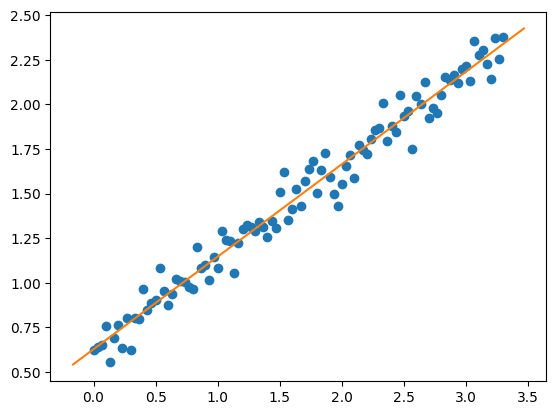

In [706]:
a = 1
b = 0.5
x = np.arange(n) / 30
X = x.reshape(-1, 1)


def make_data(rng=None):
    if rng is None:
        rng = np.random.default_rng()
    e = rng.multivariate_normal(mean=mean, cov=cov)
    y = a + b * x + e
    return y


y = make_data()
plt.plot(x, y, "o")

model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
slope = model.coef_[0]
plot_regression_line((intercept, slope))

In [707]:
df = pd.DataFrame({"x": x, "y": y})
fit = lm("y ~ x", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,0.627821,0.01659,37.843569,0.0
x,0.519014,0.008686,59.756128,0.0
sigma,0.083572,,,


In [708]:
r = 1000
coef_ests = np.zeros((r, 2))
coef_ses = np.zeros((r, 2))
sigmas = np.zeros(r)

for i in range(1000):
    df = pd.DataFrame({"x": x, "y": make_data()})
    fit = lm("y ~ x", df)
    sigmas[i] = fit.se
    coef_ests[i] = fit.coef_est
    coef_ses[i] = fit.coef_se


print(coef_ests.mean(axis=0))
print(coef_ests.std(axis=0))

[0.99323034 0.49968681]
[1.03886102 0.01026361]


In [709]:
df = pd.read_csv(
    "../data/earnings.csv", usecols=["weight", "height", "male", "ethnicity"]
).dropna()

fit = lm("weight ~ height + male + C(ethnicity)", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-99.912414,16.44868,-6.07419,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
C(ethnicity)[T.Hispanic],-6.152312,3.555277,-1.730473,0.083719
C(ethnicity)[T.Other],-12.261355,5.184896,-2.364822,0.018145
C(ethnicity)[T.White],-5.191391,2.267693,-2.289283,0.022179
sigma,28.636333,,,


In [676]:
0.05 / 3

0.016666666666666666

In [674]:
df["ethnicity"] = df["ethnicity"].astype("category")
df["ethnicity"] = df["ethnicity"].cat.reorder_categories(
    ["White", "Black", "Hispanic", "Other"]
)

fit = lm("weight ~ height + male + ethnicity", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-105.103806,16.3732,-6.419258,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
ethnicity[T.Black],5.191391,2.267693,2.289283,0.022179
ethnicity[T.Hispanic],-0.960921,2.939356,-0.326915,0.74377
ethnicity[T.Other],-7.069964,4.784855,-1.477571,0.139699
sigma,28.636333,,,


In [671]:
fit_red = lm("weight ~ height + male", df)
fit_red

,estimate,standard error,t-statistic,p-value
Intercept,-107.065451,16.197346,-6.610061,0.0
height,3.887891,0.250869,15.497673,0.0
male,11.837092,1.985109,5.962944,0.0
sigma,28.676477,,,


In [35]:
def make_data_maker(a, b, x, sigma=1.0, rng=None):
    if rng is None:
        rng = np.random.default_rng()

    def make_data():
        y = a + b * x + sigma * rng.uniform(size=len(x))
        return y

    return make_data

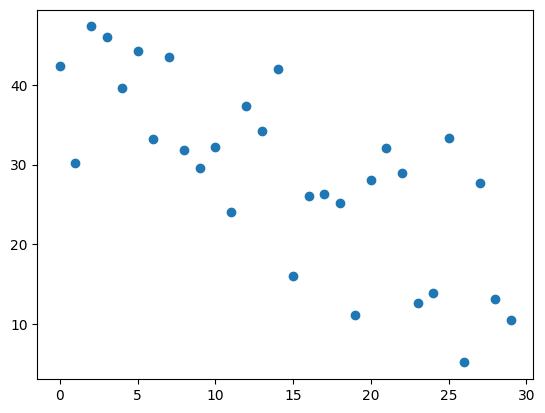

In [37]:
n = 30
x = np.arange(n)
a = n
b = -1
make_data = make_data_maker(a, b, x, n)
y = make_data()
plt.scatter(x, y)

In [42]:
r = 1000
coef_ests = np.zeros((r, 2))
coef_ses = np.zeros((r, 2))
for i in range(r):
    y = make_data()
    fit = lm("y ~ x", {"y": y, "x": x})
    coef_ests[i] = fit.coef_est
    coef_ses[i] = fit.coef_se

#### Linear Regression Cast of Characters
##### design matrix, predictor matrix, feature matrix, data matrix
- $X$, shape $(n, p)$

##### response vector, target vector
- $y$, shape $(n,)$

##### regression coefficient vector
- $\beta$, shape $(p,)$

##### multivariate linear regression model
- $y = X\beta + \epsilon$ 

##### residual vector associated to an estimate $b$ of $\beta$
- $r(b) = y - Xb$

##### least squares coefficient estimate
- $\hat{\beta}$, shape $(p,)$
- minimizer of the residual norm:
  $$\hat{\beta}=\argmin_b \|r(b)\|$$
- From linear algebra:
  $$
  \hat\beta = (X^TX)^{-1}X^Ty
  $$

### Properties of $\hat\beta$

#### Unbiasdness

- If $\mathbb{E}[\epsilon]=0$, then $\hat{\beta}$ is an unbiased estimator of $\beta$, i.e., $\mathbb{E}[\hat\beta] = \beta$.

  ***Proof:***

  By definition of $\hat\beta$ and the rules of matrix arithmetic:
  $$
  \begin{aligned}
  \hat\beta &= (X^TX)^{-1}X^Ty\\
  &= (X^TX)^{-1}X^T(X\beta + \epsilon)\\
  &= (X^TX)^{-1}X^TX\beta + (X^TX)^{-1}X^T\epsilon\\
  &= \beta + (X^TX)^{-1}X^T\epsilon\\
  \end{aligned}
  $$

  By the linearity of expectation and the assumption that $\mathbb{E}[\epsilon]=0$:
  $$
  \begin{aligned}
  \mathbb{E}[\hat\beta] &= \mathbb{E}[\beta + (X^TX)^{-1}X^T\epsilon]\\
  &=\beta + (X^TX)^{-1}X^T\mathbb{E}[\epsilon]\\
  &=\beta
  \end{aligned}
  $$

  ***Example:*** If the $\epsilon_i$ are independent and $N(0, 1)$-distributed, then $\mathbb{E}[\hat\beta] = \beta$.

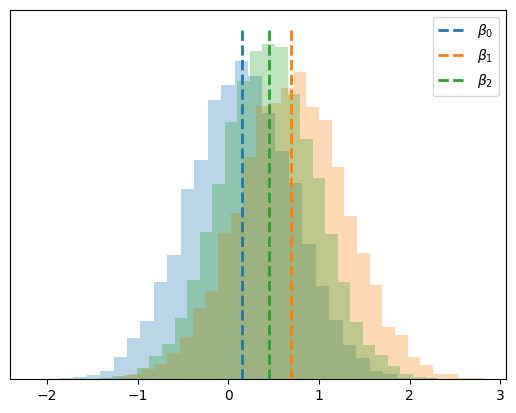

In [108]:
n = 30
p = 3
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
beta = rng.uniform(size=p)


def make_y():
    epsilon = rng.normal(size=n)
    y = X @ beta + epsilon
    return y


r = 10000
beta_hats = np.zeros((r, p))

U = np.linalg.inv(X.T @ X) @ X.T
for i in range(r):
    y = make_y()
    beta_hats[i] = U @ y

expected_beta_hat = beta + 0.5 * U @ np.ones(n)

for i in range(3):
    plt.hist(beta_hats[:, i], bins=30, density=True, alpha=0.3)

ylim = plt.ylim()
for i in range(3):
    plt.plot([beta[i], beta[i]], ylim, "--", color=f"C{i}", lw=2, label=f"$\\beta_{i}$")
    plt.yticks([])
    plt.legend()


plt.show()

***Example:*** If the $\epsilon_i$ are independent and $\operatorname{Uniform}[0,1]$-distributed, then $\mathbb{E}[\epsilon] = \tfrac12\mathbf{1}$ and
  $$
  \mathbb{E}[\hat\beta] = \beta + \underbrace{\tfrac12(X^TX)^{-1}X^T\mathbf{1}}_{\text{bias}}.
  $$

bias = [0.37 0.26 0.28]


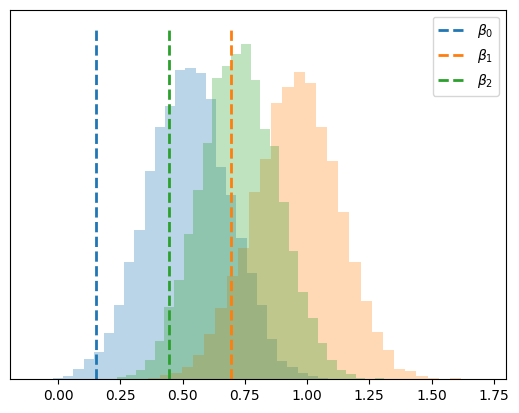

In [110]:
n = 30
p = 3
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
beta = rng.uniform(size=p)


def make_y():
    epsilon = rng.uniform(size=n)
    y = X @ beta + epsilon
    return y


r = 10000
beta_hats = np.zeros((r, p))

U = np.linalg.inv(X.T @ X) @ X.T
for i in range(r):
    y = make_y()
    beta_hats[i] = U @ y

print(f"bias = {(0.5 * U @ np.ones(n)).round(2)}")

for i in range(3):
    plt.hist(beta_hats[:, i], bins=30, density=True, alpha=0.3)

ylim = plt.ylim()
for i in range(3):
    plt.plot([beta[i], beta[i]], ylim, "--", color=f"C{i}", lw=2, label=f"$\\beta_{i}$")
    plt.yticks([])
    plt.legend()


plt.show()

$$
X^TWX\beta = X^TW y
$$

$$
\tilde{\beta} = (X^TWX)^{-1}X^TWy
$$

Let $W$ be any invertible matrix with shape $(n, n)$.

By definition of $\tilde\beta$ and the rules of matrix arithmetic:
  $$
  \begin{aligned}
  \tilde\beta &= (X^TWX)^{-1}X^TWy\\
  &= (X^TWX)^{-1}X^TW(X\beta + \epsilon)\\
  &= (X^TWX)^{-1}X^TWX\beta + (X^TWX)^{-1}X^TW\epsilon\\
  &= \beta + (X^TWX)^{-1}X^TW\epsilon\\
  \end{aligned}
  $$


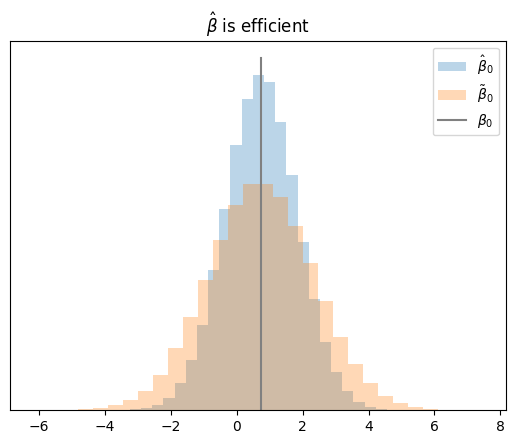

In [179]:
n = 10
p = 3
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
beta = rng.uniform(size=p)


def make_y():
    epsilon = rng.normal(size=n)
    y = X @ beta + epsilon
    return y


r = 100000
beta_hats = np.zeros((r, p))
beta_tildes = np.zeros((r, p))

U = np.linalg.inv(X.T @ X) @ X.T
W = np.diag(np.logspace(-4, 5, n))
# W = rng.uniform(size=(n, n))
V = np.linalg.inv(X.T @ W @ X) @ (X.T @ W)

for i in range(r):
    y = make_y()
    beta_hats[i] = U @ y
    beta_tildes[i] = V @ y

for i in range(1):
    plt.hist(
        beta_hats[:, i], bins=30, density=True, alpha=0.3, label="$\\hat{\\beta}_0$"
    )
    plt.hist(
        beta_tildes[:, i], bins=30, density=True, alpha=0.3, label="$\\tilde{\\beta}_0$"
    )
    plt.yticks([])

plt.plot([beta[0], beta[0]], plt.ylim(), color="grey", label="$\\beta_0$")
plt.title("$\\hat{\\beta}$ is efficient")
plt.legend()
plt.show()

#### Gauss-Markov theorem

- An estimator of $\beta$ of the form $Ay$ is called a **linear estimator**.

- Let
  $$\mathcal{U}=\{A : AX\beta = \beta\}.$$

- If $\mathbb{E}[\epsilon]=0$, then
  $$
  \begin{aligned}
  \mathbb{E}[Ay]&=\mathbb{E}[A(X\beta + \epsilon)]\\
  &=AX\beta + A\mathbb{E}[\epsilon]\\
  &= AX\beta.
  \end{aligned}
  $$

- Thus, if $\mathbb{E}[\epsilon]=0$, then
  $$\mathbb{E}[Ay]=\beta \Longleftrightarrow A\in\mathcal{U}.$$

- In other words, the linear, unbiased estimators of $\beta$ are those of the form $Ay$ for $A\in\mathcal{U}$.

##### Theorem
Suppose the errors $\epsilon_i$ are IID with mean $0$. Then
$$
\mathbb{V}[\hat{\beta}] \leq \mathbb{V}[Ay]
$$
for all $A\in\mathcal{U}$.

Thus, $\hat{\beta}$ is the **best, linear, unbiased estimator (BLUE)** of $\beta$, where *best* means *minimal variance*.

In [248]:
df = pd.read_csv("../data/auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


You're studying whether extra study sessions help students prepare for a standardized test (e.g. SAT).



In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

auto = pd.read_csv(
    "../data/auto.csv",
    na_values=["?"],
    usecols=[
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
    ],
).dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


In [125]:
def train_test_split(random_state=None):
    X_train = auto.sample(frac=1, replace=True, random_state=random_state)
    X_test = auto.iloc[~auto.index.isin(X_train.index)]
    y_train = X_train.pop("mpg")
    y_test = X_test.pop("mpg")
    return X_train, X_test, y_train, y_test


model = LinearRegression()

In [126]:
r = 1000
mses_train = np.zeros(r)
maes_train = np.zeros(r)

mses_test = np.zeros(r)
maes_test = np.zeros(r)

for i in range(r):
    X_train, X_test, y_train, y_test = train_test_split()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    mses_train[i] = mean_squared_error(y_train, y_train_pred)
    maes_train[i] = mean_absolute_error(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    mses_test[i] = mean_squared_error(y_test, y_test_pred)
    maes_test[i] = mean_absolute_error(y_test, y_test_pred)

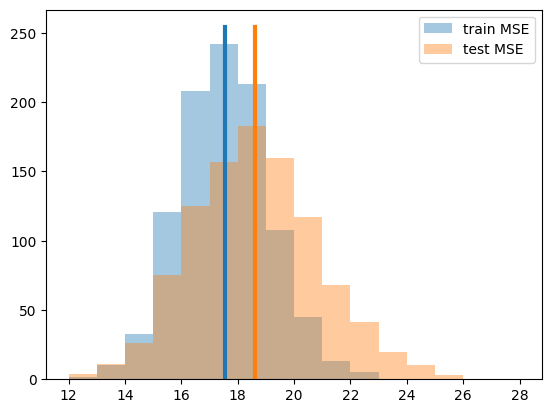

In [127]:
bins = np.arange(12, 29)
plt.hist(mses_train, alpha=0.4, label="train MSE", bins=bins)
plt.hist(mses_test, alpha=0.4, label="test MSE", bins=bins)

ylim = plt.ylim()
plt.plot([mses_train.mean(), mses_train.mean()], ylim, "C0", lw=3)
plt.plot([mses_test.mean(), mses_test.mean()], ylim, "C1", lw=3)

plt.legend()

In [128]:
mses_train.mean(), mses_test.mean(), mses_train.std(), mses_test.std()

(17.56048736241087, 18.629186447784225, 1.5611764951151497, 2.223949063423433)

In [129]:
auto["hp_squared"] = auto["horsepower"] ** 2

In [130]:
r = 1000
mses_train = np.zeros(r)
maes_train = np.zeros(r)

mses_test = np.zeros(r)
maes_test = np.zeros(r)

for i in range(r):
    X_train, X_test, y_train, y_test = train_test_split()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    mses_train[i] = mean_squared_error(y_train, y_train_pred)
    maes_train[i] = mean_absolute_error(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    mses_test[i] = mean_squared_error(y_test, y_test_pred)
    maes_test[i] = mean_absolute_error(y_test, y_test_pred)

In [436]:
mses_train.mean(), mses_test.mean(), mses_train.std(), mses_test.std()

(14.757856483722586,
 15.955733874386407,
 1.3836055501961617,
 1.9840935924594134)

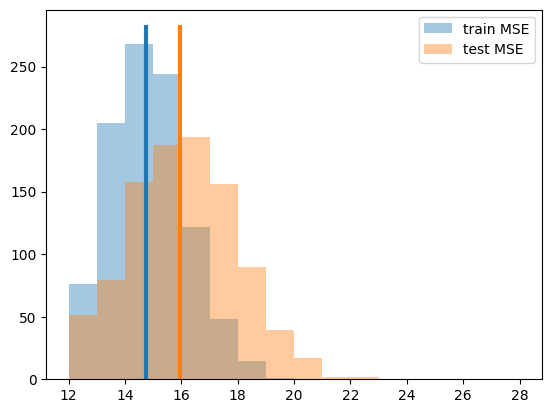

In [437]:
bins = np.arange(12, 29)
plt.hist(mses_train, alpha=0.4, label="train MSE", bins=bins)
plt.hist(mses_test, alpha=0.4, label="test MSE", bins=bins)

ylim = plt.ylim()
plt.plot([mses_train.mean(), mses_train.mean()], ylim, "C0", lw=3)
plt.plot([mses_test.mean(), mses_test.mean()], ylim, "C1", lw=3)

plt.legend()

In [3]:
auto = pd.read_csv(
    "../data/auto.csv", na_values=["?"], dtype={"origin": "category"}
).dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [53]:
columns

['acceleration',
 'cylinders',
 'displacement',
 'horsepower',
 'origin',
 'weight',
 'year']

In [75]:
columns = sorted(auto.columns[1:-1])
p = len(columns) + 1
features = [[] for _ in range(p)]
features[0].append(tuple())
for i in range(1, p):
    for f in features[i - 1]:
        for c in columns:
            if len(f) == 0 or c > f[-1]:
                t = (*f, c)
                features[i].append(t)

formulas = [[f'mpg ~ 1 + {" + ".join(g)}' for g in f] for f in features]
formulas[0] = ["mpg ~ 1"]

In [120]:
def bootstrap_split(df, frac=1.0, random_state=None):
    train = df.sample(frac=frac, replace=True, random_state=random_state)
    test = df.iloc[~df.index.isin(train.index)]
    return train, test

In [89]:
from sklearn.metrics import mean_squared_error

r = 100
train_mses = [np.zeros((len(f), r)) for f in formulas]
test_mses = [np.zeros((len(f), r)) for f in formulas]

for i in range(r):
    if i % 10 == 0:
        print(i)
    train, test = bootstrap_split(auto)
    y_train = train["mpg"]
    y_test = test["mpg"]
    for j in range(p):
        for k, formula in enumerate(formulas[j]):
            fit = lm(formula, auto)
            y_train_pred = fit.predict(train)
            y_test_pred = fit.predict(test)
            train_mses[j][k, i] = mean_squared_error(y_train, y_train_pred)
            test_mses[j][k, i] = mean_squared_error(y_test, y_test_pred)

0
10
20
30
40
50
60
70
80
90


In [110]:
I = [x.mean(axis=1).argmin() for x in train_mses]
E = [x.mean(axis=1).min() for x in train_mses]
[(f[i], f"{e:.2f}") for f, i, e in zip(formulas, I, E)]

[('mpg ~ 1', '60.53'),
 ('mpg ~ 1 + weight', '18.67'),
 ('mpg ~ 1 + weight + year', '11.62'),
 ('mpg ~ 1 + origin + weight + year', '11.00'),
 ('mpg ~ 1 + displacement + origin + weight + year', '10.90'),
 ('mpg ~ 1 + displacement + horsepower + origin + weight + year', '10.77'),
 ('mpg ~ 1 + cylinders + displacement + horsepower + origin + weight + year',
  '10.70'),
 ('mpg ~ 1 + acceleration + cylinders + displacement + horsepower + origin + weight + year',
  '10.69')]

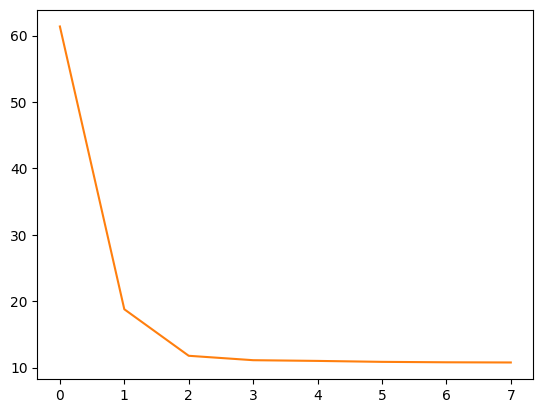

In [111]:
plt.plot(np.arange(p), [x.mean(axis=1).min() for x in test_mses], color="C1")

In [117]:
acceleration = auto["acceleration"].to_numpy()
np.random.shuffle(acceleration)
auto["acceleration"] = acceleration

cylinders = auto["cylinders"].to_numpy()
np.random.shuffle(cylinders)
auto["cylinders"] = cylinders

displacement = auto["displacement"].to_numpy()
np.random.shuffle(displacement)
auto["displacement"] = displacement

horsepower = auto["horsepower"].to_numpy()
np.random.shuffle(horsepower)
auto["horsepower"] = horsepower

In [ ]:
r = 100
train_mses = [np.zeros((len(f), r)) for f in formulas]
test_mses = [np.zeros((len(f), r)) for f in formulas]

for i in range(r):
    if i % 10 == 0:
        print(i)
    train, test = bootstrap_split(auto)
    y_train = train["mpg"]
    y_test = test["mpg"]
    for j in range(p):
        for k, formula in enumerate(formulas[j]):
            fit = lm(formula, auto)
            y_train_pred = fit.predict(train)
            y_test_pred = fit.predict(test)
            train_mses[j][k, i] = mean_squared_error(y_train, y_train_pred)
            test_mses[j][k, i] = mean_squared_error(y_test, y_test_pred)

0
10
20
30
40
50
60
70
80
90


In [119]:
I = [x.mean(axis=1).argmin() for x in train_mses]
E = [x.mean(axis=1).min() for x in train_mses]
[(f[i], f"{e:.2f}") for f, i, e in zip(formulas, I, E)]

[('mpg ~ 1', '60.49'),
 ('mpg ~ 1 + weight', '18.54'),
 ('mpg ~ 1 + weight + year', '11.62'),
 ('mpg ~ 1 + origin + weight + year', '10.98'),
 ('mpg ~ 1 + horsepower + origin + weight + year', '10.90'),
 ('mpg ~ 1 + acceleration + horsepower + origin + weight + year', '10.86'),
 ('mpg ~ 1 + acceleration + displacement + horsepower + origin + weight + year',
  '10.85'),
 ('mpg ~ 1 + acceleration + cylinders + displacement + horsepower + origin + weight + year',
  '10.83')]

In [121]:
r = 100
train_mses = [np.zeros((len(f), r)) for f in formulas]
test_mses = [np.zeros((len(f), r)) for f in formulas]

for i in range(r):
    if i % 10 == 0:
        print(i)
    train, test = bootstrap_split(auto, frac=0.2)
    y_train = train["mpg"]
    y_test = test["mpg"]
    for j in range(p):
        for k, formula in enumerate(formulas[j]):
            fit = lm(formula, auto)
            y_train_pred = fit.predict(train)
            y_test_pred = fit.predict(test)
            train_mses[j][k, i] = mean_squared_error(y_train, y_train_pred)
            test_mses[j][k, i] = mean_squared_error(y_test, y_test_pred)

0
10
20
30
40
50
60
70
80
90


In [123]:
I = [x.mean(axis=1).argmin() for x in test_mses]
E = [x.mean(axis=1).min() for x in test_mses]
[(f[i], f"{e:.2f}") for f, i, e in zip(formulas, I, E)]

[('mpg ~ 1', '60.72'),
 ('mpg ~ 1 + weight', '18.64'),
 ('mpg ~ 1 + weight + year', '11.66'),
 ('mpg ~ 1 + origin + weight + year', '11.02'),
 ('mpg ~ 1 + horsepower + origin + weight + year', '10.95'),
 ('mpg ~ 1 + acceleration + horsepower + origin + weight + year', '10.91'),
 ('mpg ~ 1 + acceleration + displacement + horsepower + origin + weight + year',
  '10.89'),
 ('mpg ~ 1 + acceleration + cylinders + displacement + horsepower + origin + weight + year',
  '10.88')]

In [151]:
auto = pd.read_csv(
    "../data/auto.csv",
    na_values=["?"],
).dropna()

for c in auto.columns[1:7]:
    auto[f"{c}_squared"] = auto[c] ** 2

auto["origin"] = auto["origin"].astype("category")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cylinders_squared,displacement_squared,horsepower_squared,weight_squared,acceleration_squared,year_squared
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,64,94249.0,16900.0,12278016,144.00,4900
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,64,122500.0,27225.0,13638249,132.25,4900
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,64,101124.0,22500.0,11806096,121.00,4900
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,64,92416.0,22500.0,11785489,144.00,4900
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,64,91204.0,19600.0,11895601,110.25,4900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,16,19600.0,7396.0,7784100,243.36,6724
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,16,9409.0,2704.0,4536900,605.16,6724
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,16,18225.0,7056.0,5267025,134.56,6724
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,16,14400.0,6241.0,6890625,345.96,6724


In [152]:
formula = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin"

r = 1000
mses_train = np.zeros(r)
maes_train = np.zeros(r)

mses_test = np.zeros(r)
maes_test = np.zeros(r)

for i in range(r):
    train, test = bootstrap_split(auto)
    fit = lm(formula, train)

    mpg_train_pred = fit.predict(train)
    mses_train[i] = mean_squared_error(train["mpg"], mpg_train_pred)
    maes_train[i] = mean_absolute_error(train["mpg"], mpg_train_pred)

    mpg_test_pred = fit.predict(test)
    mses_test[i] = mean_squared_error(test["mpg"], mpg_test_pred)
    maes_test[i] = mean_absolute_error(test["mpg"], mpg_test_pred)

In [153]:
fit

,estimate,standard error,t-statistic,p-value
Intercept,-16.271142,4.458656,-3.649338,0.000299
cylinders,-0.589557,0.335401,-1.757768,0.079586
displacement,0.021458,0.007387,2.904803,0.003888
horsepower,-0.015374,0.014088,-1.09126,0.275845
weight,-0.006494,0.000693,-9.377045,0.0
acceleration,0.046152,0.099896,0.462,0.644344
year,0.766290,0.048926,15.662128,0.0
origin[T.2],2.029835,0.562622,3.607814,0.00035
origin[T.3],2.638537,0.529977,4.978587,0.000001
sigma,3.272702,,,


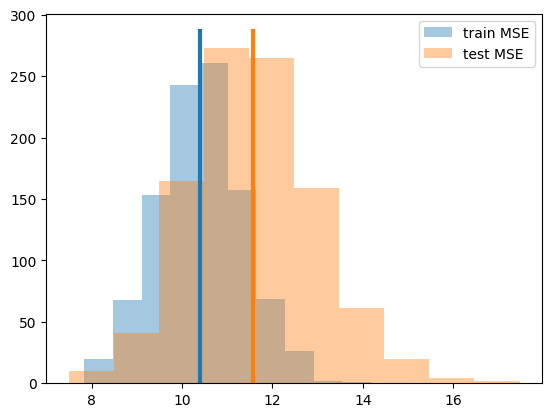

In [154]:
plt.hist(mses_train, alpha=0.4, label="train MSE")
plt.hist(mses_test, alpha=0.4, label="test MSE")

ylim = plt.ylim()
plt.plot([mses_train.mean(), mses_train.mean()], ylim, "C0", lw=3)
plt.plot([mses_test.mean(), mses_test.mean()], ylim, "C1", lw=3)

plt.legend()

In [158]:
formula = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin"
lm(formula, auto)

,estimate,standard error,t-statistic,p-value
Intercept,-17.954602,4.676934,-3.838969,0.000145
cylinders,-0.489709,0.321231,-1.524478,0.128215
displacement,0.023979,0.007653,3.133124,0.001863
horsepower,-0.018183,0.013709,-1.326428,0.185488
weight,-0.006710,0.000655,-10.242779,0.0
acceleration,0.079103,0.098218,0.805378,0.421101
year,0.777027,0.051784,15.00513,0.0
origin[T.2],2.630002,0.566415,4.643246,0.000005
origin[T.3],2.853228,0.552736,5.162006,0.0
sigma,3.306530,,,


In [185]:
formula = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + horsepower_squared"

r = 1000
mses_train = np.zeros(r)
maes_train = np.zeros(r)

mses_test = np.zeros(r)
maes_test = np.zeros(r)

for i in range(r):
    train, test = bootstrap_split(auto)
    fit = lm(formula, train)

    mpg_train_pred = fit.predict(train)
    mses_train[i] = mean_squared_error(train["mpg"], mpg_train_pred)
    maes_train[i] = mean_absolute_error(train["mpg"], mpg_train_pred)

    mpg_test_pred = fit.predict(test)
    mses_test[i] = mean_squared_error(test["mpg"], mpg_test_pred)
    maes_test[i] = mean_absolute_error(test["mpg"], mpg_test_pred)

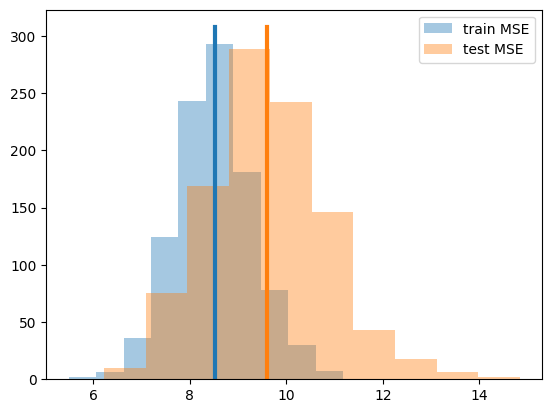

In [186]:
plt.hist(mses_train, alpha=0.4, label="train MSE")
plt.hist(mses_test, alpha=0.4, label="test MSE")

ylim = plt.ylim()
plt.plot([mses_train.mean(), mses_train.mean()], ylim, "C0", lw=3)
plt.plot([mses_test.mean(), mses_test.mean()], ylim, "C1", lw=3)

plt.legend()

In [187]:
formula = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + horsepower_squared"
lm(formula, auto)

,estimate,standard error,t-statistic,p-value
Intercept,1.149180,4.73302,0.242801,0.80829
cylinders,0.333900,0.305169,1.094146,0.27458
displacement,-0.005452,0.007658,-0.71191,0.476955
horsepower,-0.314041,0.034752,-9.036698,0.0
weight,-0.003425,0.000695,-4.926781,0.000001
acceleration,-0.323150,0.099448,-3.249438,0.001259
year,0.745785,0.047115,15.82902,0.0
origin[T.2],1.487539,0.529034,2.811805,0.005181
origin[T.3],2.045248,0.509336,4.015514,0.000071
horsepower_squared,0.000986,0.000108,9.117602,0.0


['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'cylinders_squared', 'displacement_squared', 'horsepower_squared', 'weight_squared', 'acceleration_squared', 'year_squared']


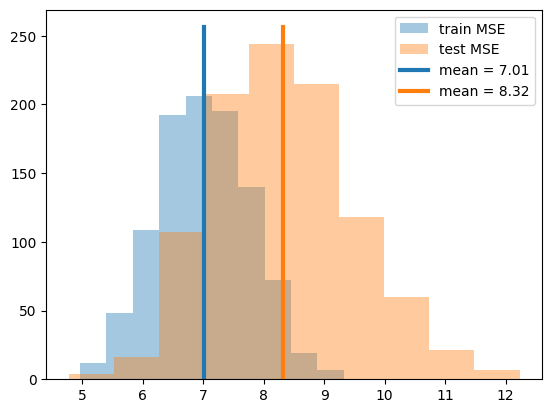

In [ ]:
features = [c for c in auto.columns if c not in ["mpg", "name"]]
formula = f"mpg ~ {" + ".join(features)}"
print(features)

r = 1000
mses_train = np.zeros(r)
maes_train = np.zeros(r)

mses_test = np.zeros(r)
maes_test = np.zeros(r)

for i in range(r):
    train, test = bootstrap_split(auto)
    fit = lm(formula, train)

    mpg_train_pred = fit.predict(train)
    mses_train[i] = mean_squared_error(train["mpg"], mpg_train_pred)
    maes_train[i] = mean_absolute_error(train["mpg"], mpg_train_pred)

    mpg_test_pred = fit.predict(test)
    mses_test[i] = mean_squared_error(test["mpg"], mpg_test_pred)
    maes_test[i] = mean_absolute_error(test["mpg"], mpg_test_pred)

plt.hist(mses_train, alpha=0.4, label="train MSE")
plt.hist(mses_test, alpha=0.4, label="test MSE")

ylim = plt.ylim()
plt.plot(
    [mses_train.mean(), mses_train.mean()],
    ylim,
    "C0",
    lw=3,
    label=f"mean = {mses_train.mean():.2f}",
)
plt.plot(
    [mses_test.mean(), mses_test.mean()],
    ylim,
    "C1",
    lw=3,
    label=f"mean = {mses_test.mean():.2f}",
)

plt.legend()

In [189]:
lm(formula, auto)

,estimate,standard error,t-statistic,p-value
Intercept,406.888434,69.277898,5.873279,0.0
cylinders,0.960305,1.413392,0.679433,0.49728
displacement,-0.025586,0.022498,-1.13726,0.256152
horsepower,-0.154465,0.04153,-3.719332,0.00023
weight,-0.013216,0.002681,-4.929008,0.000001
acceleration,-1.677267,0.555234,-3.020827,0.002693
year,-9.562431,1.84026,-5.196239,0.0
origin[T.2],1.105292,0.534787,2.066789,0.039436
origin[T.3],1.258246,0.512634,2.454474,0.01456
cylinders_squared,-0.046545,0.114238,-0.407441,0.683916


['horsepower', 'weight', 'acceleration', 'year', 'origin', 'horsepower_squared', 'weight_squared', 'acceleration_squared', 'year_squared']


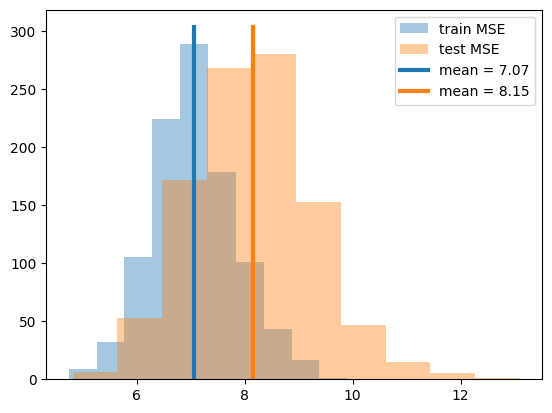

In [190]:
features = [
    c
    for c in auto.columns
    if c
    not in [
        "mpg",
        "name",
        "displacement",
        "displacement_squared",
        "cylinders",
        "cylinders_squared",
    ]
]
print(features)
formula = f"mpg ~ {" + ".join(features)}"

r = 1000
mses_train = np.zeros(r)
maes_train = np.zeros(r)

mses_test = np.zeros(r)
maes_test = np.zeros(r)

for i in range(r):
    train, test = bootstrap_split(auto)
    fit = lm(formula, train)

    mpg_train_pred = fit.predict(train)
    mses_train[i] = mean_squared_error(train["mpg"], mpg_train_pred)
    maes_train[i] = mean_absolute_error(train["mpg"], mpg_train_pred)

    mpg_test_pred = fit.predict(test)
    mses_test[i] = mean_squared_error(test["mpg"], mpg_test_pred)
    maes_test[i] = mean_absolute_error(test["mpg"], mpg_test_pred)

plt.hist(mses_train, alpha=0.4, label="train MSE")
plt.hist(mses_test, alpha=0.4, label="test MSE")

ylim = plt.ylim()
plt.plot(
    [mses_train.mean(), mses_train.mean()],
    ylim,
    "C0",
    lw=3,
    label=f"mean = {mses_train.mean():.2f}",
)
plt.plot(
    [mses_test.mean(), mses_test.mean()],
    ylim,
    "C1",
    lw=3,
    label=f"mean = {mses_test.mean():.2f}",
)

plt.legend()

In [191]:
lm(formula, auto)

,estimate,standard error,t-statistic,p-value
Intercept,400.276072,68.832612,5.81521,0.0
horsepower,-0.153402,0.03756,-4.084211,0.000054
weight,-0.014905,0.001928,-7.729651,0.0
acceleration,-1.750676,0.498624,-3.511017,0.0005
year,-9.294958,1.824456,-5.094645,0.000001
origin[T.2],1.345463,0.440165,3.056725,0.002395
origin[T.3],1.488903,0.453785,3.281073,0.001129
horsepower_squared,0.000353,0.000122,2.888909,0.004087
weight_squared,0.000002,0.0,6.41108,0.0
acceleration_squared,0.047743,0.01496,3.191414,0.001533


In [196]:
def bootstrap_mse(df, target, features, r=1000):
    formula = f"{target} ~ {" + ".join(features)}"
    mses_train = np.zeros(r)
    maes_train = np.zeros(r)

    mses_test = np.zeros(r)
    maes_test = np.zeros(r)

    for i in range(r):
        train, test = bootstrap_split(df)
        fit = lm(formula, train)

        mpg_train_pred = fit.predict(train)
        mses_train[i] = mean_squared_error(train[target], mpg_train_pred)
        maes_train[i] = mean_absolute_error(train[target], mpg_train_pred)

        mpg_test_pred = fit.predict(test)
        mses_test[i] = mean_squared_error(test[target], mpg_test_pred)
        maes_test[i] = mean_absolute_error(test[target], mpg_test_pred)

    plt.hist(mses_train, alpha=0.4, label="train MSE")
    plt.hist(mses_test, alpha=0.4, label="test MSE")

    ylim = plt.ylim()
    plt.plot(
        [mses_train.mean(), mses_train.mean()],
        ylim,
        "C0",
        lw=3,
        label=f"mean = {mses_train.mean():.2f}",
    )
    plt.plot(
        [mses_test.mean(), mses_test.mean()],
        ylim,
        "C1",
        lw=3,
        label=f"mean = {mses_test.mean():.2f}",
    )
    plt.legend()

    return formula

cylinders
displacement
horsepower
weight
acceleration
year
origin
cylinders_squared
displacement_squared
horsepower_squared
weight_squared
acceleration_squared
year_squared


,estimate,standard error,t-statistic,p-value
Intercept,406.888434,69.277898,5.873279,0.0
cylinders,0.960305,1.413392,0.679433,0.49728
displacement,-0.025586,0.022498,-1.13726,0.256152
horsepower,-0.154465,0.04153,-3.719332,0.00023
weight,-0.013216,0.002681,-4.929008,0.000001
acceleration,-1.677267,0.555234,-3.020827,0.002693
year,-9.562431,1.84026,-5.196239,0.0
origin[T.2],1.105292,0.534787,2.066789,0.039436
origin[T.3],1.258246,0.512634,2.454474,0.01456
cylinders_squared,-0.046545,0.114238,-0.407441,0.683916


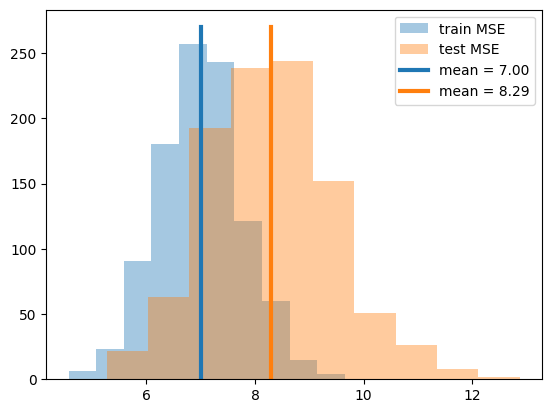

In [202]:
features = [c for c in auto.columns if c not in ["mpg", "name"]]
for f in features:
    print(f)
display(lm(formula, auto))
formula = bootstrap_mse(auto, "mpg", features)

horsepower
weight
acceleration
year
origin
horsepower_squared
weight_squared
acceleration_squared
year_squared


,estimate,standard error,t-statistic,p-value
Intercept,406.888434,69.277898,5.873279,0.0
cylinders,0.960305,1.413392,0.679433,0.49728
displacement,-0.025586,0.022498,-1.13726,0.256152
horsepower,-0.154465,0.04153,-3.719332,0.00023
weight,-0.013216,0.002681,-4.929008,0.000001
acceleration,-1.677267,0.555234,-3.020827,0.002693
year,-9.562431,1.84026,-5.196239,0.0
origin[T.2],1.105292,0.534787,2.066789,0.039436
origin[T.3],1.258246,0.512634,2.454474,0.01456
cylinders_squared,-0.046545,0.114238,-0.407441,0.683916


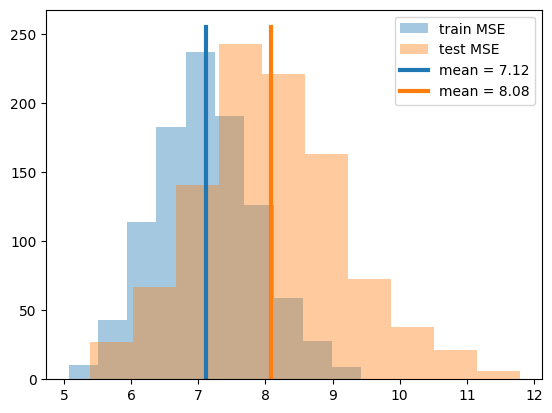

In [203]:
features = [
    c
    for c in auto.columns
    if c
    not in [
        "mpg",
        "name",
        "displacement",
        "displacement_squared",
        "cylinders",
        "cylinders_squared",
    ]
]
for f in features:
    print(f)
display(lm(formula, auto))
formula = bootstrap_mse(auto, "mpg", features)

In [204]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   mpg                   392 non-null    float64 
 1   cylinders             392 non-null    int64   
 2   displacement          392 non-null    float64 
 3   horsepower            392 non-null    float64 
 4   weight                392 non-null    int64   
 5   acceleration          392 non-null    float64 
 6   year                  392 non-null    int64   
 7   origin                392 non-null    category
 8   name                  392 non-null    object  
 9   cylinders_squared     392 non-null    int64   
 10  displacement_squared  392 non-null    float64 
 11  horsepower_squared    392 non-null    float64 
 12  weight_squared        392 non-null    int64   
 13  acceleration_squared  392 non-null    float64 
 14  year_squared          392 non-null    int64   
dtypes: category

In [224]:
from pandas.api.types import is_numeric_dtype

auto = pd.read_csv(
    "../data/auto.csv",
    na_values=["?"],
).dropna()
auto["origin"] = auto["origin"].astype("category")

auto_std = auto.copy()
for c in auto_std.columns:
    if is_numeric_dtype(auto_std[c]) and c != "mpg":
        x = auto_std[c]
        auto_std[c] = (x - x.mean()) / x.std()
        auto_std[f"{c}_squared"] = auto_std[c] ** 2

In [226]:
auto_std

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cylinders_squared,displacement_squared,horsepower_squared,weight_squared,acceleration_squared,year_squared
0,18.0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,1,chevrolet chevelle malibu,2.196481,1.157592,0.439947,0.384088,1.647674,2.634911
1,15.0,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,1,buick skylark 320,2.196481,2.210668,2.473023,0.709398,2.145790,2.634911
2,18.0,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,1,plymouth satellite,2.196481,1.394839,1.399217,0.291268,2.709598,2.634911
3,16.0,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,1,amc rebel sst,2.196481,1.096724,1.399217,0.287468,1.647674,2.634911
4,17.0,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,1,ford torino,2.196481,1.057059,0.852086,0.308022,3.339097,2.634911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,-0.862911,-0.519972,-0.479835,-0.220842,0.021267,1.634321,1,ford mustang gl,0.744615,0.270371,0.230241,0.048771,0.000452,2.671005
393,44.0,-0.862911,-0.930889,-1.363154,-0.997859,3.283479,1.634321,2,vw pickup,0.744615,0.866555,1.858189,0.995723,10.781237,2.671005
394,32.0,-0.862911,-0.567753,-0.531795,-0.803605,-1.428605,1.634321,1,dodge rampage,0.744615,0.322344,0.282805,0.645781,2.040912,2.671005
395,28.0,-0.862911,-0.711097,-0.661694,-0.415097,1.108671,1.634321,1,ford ranger,0.744615,0.505658,0.437840,0.172305,1.229152,2.671005


cylinders
displacement
horsepower
weight
acceleration
year
origin
cylinders_squared
displacement_squared
horsepower_squared
weight_squared
acceleration_squared
year_squared


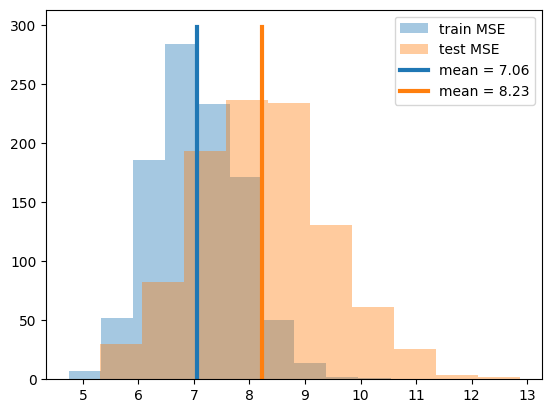

In [236]:
features = [c for c in auto_std.columns if c not in ["mpg", "name"]]
for f in features:
    print(f)
formula = bootstrap_mse(auto_std, "mpg", features)

horsepower
weight
acceleration
year
origin
horsepower_squared
weight_squared
acceleration_squared
year_squared


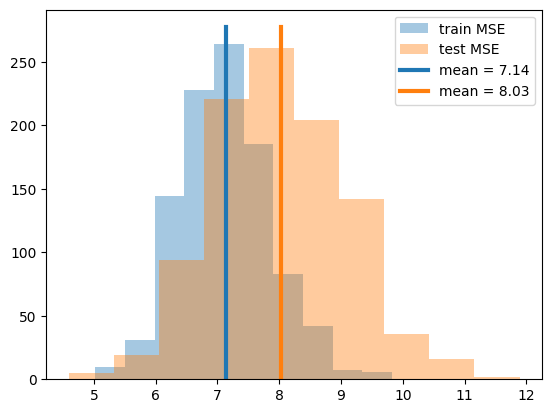

In [237]:
features = [
    c
    for c in auto_std.columns
    if c
    not in [
        "mpg",
        "name",
        "displacement",
        "displacement_squared",
        "cylinders",
        "cylinders_squared",
    ]
]
for f in features:
    print(f)
formula = bootstrap_mse(auto_std, "mpg", features)

In [241]:
def make_y_maker(X, b, sigma=1, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    n = len(X)

    def make_y():
        y = X @ b + sigma * rng.normal(size=n)
        return y

    return make_y


n = 30
p = 25
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
make_y = make_y_maker(X, b)
y = make_y()

In [261]:
df = pd.DataFrame({"y": y, **{f"x{j}": X[:, j] for j in range(p)}})
rhs = " + ".join([f"x{j}" for j in range(p)])
formula = f"y ~ 0 + {rhs}"
fit = lm(formula, df)
fit

,estimate,standard error,t-statistic,p-value
x0,-0.176291,2.315821,-0.076124,0.942272
x1,-2.378778,2.124142,-1.119877,0.313657
x2,-0.552950,1.838502,-0.300761,0.775701
x3,0.203994,2.054332,0.099299,0.924759
x4,-4.525727,2.888688,-1.566707,0.177964
x5,2.693650,2.074863,1.29823,0.250862
x6,-0.280458,1.818154,-0.154254,0.883442
x7,-4.883046,2.77746,-1.758098,0.139064
x8,-2.380067,2.091029,-1.138228,0.306608
x9,-0.750635,2.056413,-0.365021,0.730027


In [267]:
I = fit.ttest.pval.argsort()[:5]
[f"x{i}" for i in fit.ttest.pval.argsort()[:5]]

['x11', 'x17', 'x7', 'x10', 'x4']

In [311]:
def make_data_maker(p=1, sigma=1.0, random_state=42):
    rng = np.random.default_rng(random_state)
    beta = rng.uniform(size=p)

    def make_data(n):
        X = rng.uniform(size=(n, p))
        e = sigma * rng.normal(size=n)
        y = X @ beta + e
        return X, y

    return make_data

In [399]:
make_data = make_data_maker()
X_test, y_test = make_data(1000000)

r = 100
ns = np.arange(5, 200, 5)
train_errors = np.zeros((r, len(ns)))
test_errors = np.zeros((r, len(ns)))
model = LinearRegression()

for i in range(r):
    for j, n in enumerate(ns):
        X_train, y_train = make_data(n)
        model.fit(X_train, y_train)
        train_errors[i, j] = mean_squared_error(y_train, model.predict(X_train))
        test_errors[i, j] = mean_squared_error(y_test, model.predict(X_test))

train_errors = train_errors.mean(axis=0)
test_errors = test_errors.mean(axis=0)

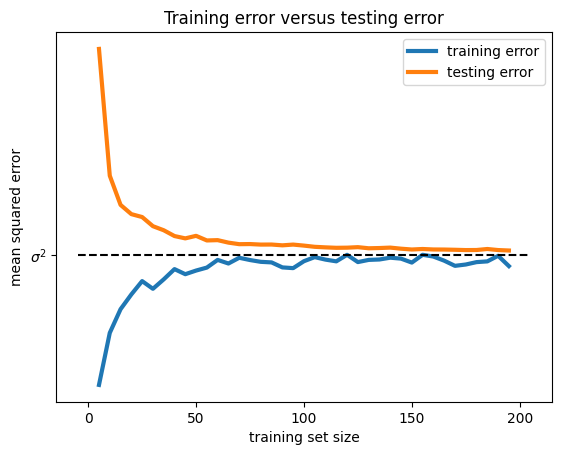

In [403]:
plt.plot(ns, train_errors, lw=3, label="training error")
plt.plot(ns, test_errors, lw=3, label="testing error")
plt.plot(plt.xlim(), [1, 1], "k--")
plt.yticks([1], ["$\\sigma^2$"])
plt.xlabel("training set size")
plt.ylabel("mean squared error")
plt.title("Training error versus testing error")
plt.legend()
plt.show()

In [433]:
auto = (
    pd.read_csv("../data/auto.csv", na_values=["?"], dtype={"origin": "category"})
    .drop(columns=["name"])
    .dropna()
)

origin = auto.pop("origin")
auto["european"] = origin == "2"
auto["japanese"] = origin == "3"
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,european,japanese
0,18.0,8,307.0,130.0,3504,12.0,70,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,False,False
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,False,False
393,44.0,4,97.0,52.0,2130,24.6,82,True,False
394,32.0,4,135.0,84.0,2295,11.6,82,False,False
395,28.0,4,120.0,79.0,2625,18.6,82,False,False


In [441]:
from sklearn.model_selection import train_test_split

X = auto.copy()
y = X.pop("mpg")

r = 1000
train_errors = np.zeros(r)
test_errors = np.zeros(r)

model = LinearRegression()
for i in range(r):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    model.fit(X_train, y_train)
    train_errors[i] = mean_squared_error(y_train, model.predict(X_train))
    test_errors[i] = mean_squared_error(y_test, model.predict(X_test))

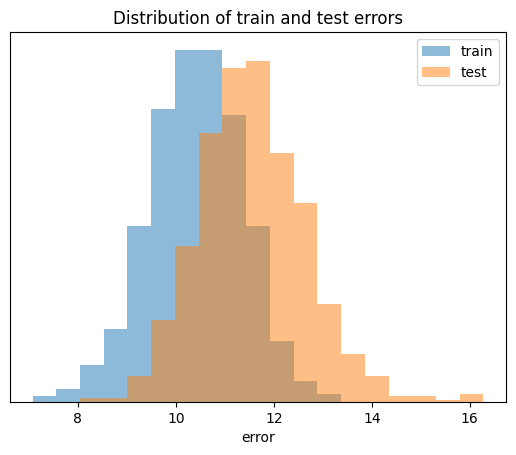

In [450]:
m = np.min([*train_errors, *test_errors])
M = np.max([*train_errors, *test_errors])
bins = np.linspace(m, M, 20)
plt.hist(train_errors, alpha=0.5, bins=bins, label="train")
plt.hist(test_errors, alpha=0.5, bins=bins, label="test")
plt.xlabel("error")
plt.yticks([])
plt.legend()
plt.title(f"Distribution of train and test errors")
plt.show()